### Determining Saturation Thresholds

In this notebook, we will manually label the point of saturation for several simulations, by inspecting graphs of areal density for when they "turn over" into a quasi-equilibrium state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from typing import List, Tuple, Dict

In [2]:
def plot_metrics(*,
                 base_path: str,
                 simulation_ids: List[int],
                 plot_grid_dimensions: Tuple[int, int],
                 slope: float,
                 r_stat_multiplier: float,
                 min_rim_percentage: float,
                 effective_radius_multiplier: float,
                 metric: str,
                 metric_label: str,
                 figsize: Tuple[float, float],
                 saturation_points: Dict[int, int] = None) -> Dict[int, pd.DataFrame]:
    """
    Plots metrics for the supplied simulation ids.
    Returns a dictionary of the simulations' ids to their dataframes.
    """
    result: Dict[int, pd.DataFrame] = dict()
    
    fig, axes = plt.subplots(nrows=plot_grid_dimensions[0], ncols=plot_grid_dimensions[1], figsize=figsize)
    
    plot_counter = 0
    
    for simulation_id in simulation_ids:
        filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{simulation_id}/statistics.csv'
        data = pd.read_csv(filename)
        data = data.rename(columns={
            'n_craters_added_in_observed_area': 'n_craters_added_in_study_region',
            'n_craters_in_observed_area': 'n_craters_in_study_region'})

        ax_row = plot_counter // plot_grid_dimensions[1]
        ax_col = plot_counter % plot_grid_dimensions[1]
        ax = axes[ax_row][ax_col]
        
        ax.plot(data.n_craters_added_in_study_region, data[metric])
        ax.set_xlabel('Craters Generated')
        ax.set_ylabel(metric_label)
        
        if saturation_points and simulation_id in saturation_points:
            ax.axvline(x=saturation_points[simulation_id], ls="--")
        
        
        result[simulation_id] = data
        
        plot_counter += 1
        
    return data

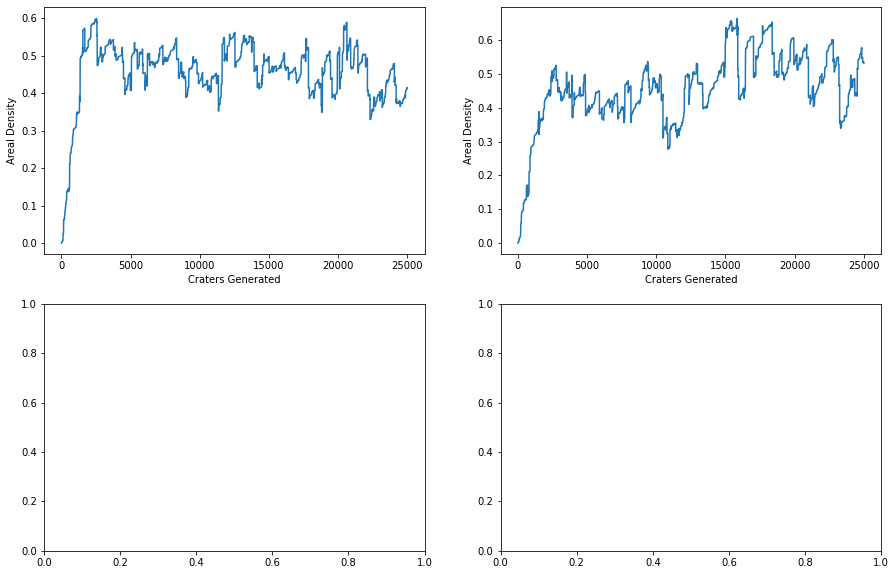

In [8]:
# For run 1.50_3.00_0.60_1.90
data = plot_metrics(base_path='/home/mason/full_runs/python/testing/',
                    simulation_ids=list(range(1, 3)),
                    plot_grid_dimensions=(2, 2),
                    slope=1.00,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.40,
                    effective_radius_multiplier=1.50,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10))

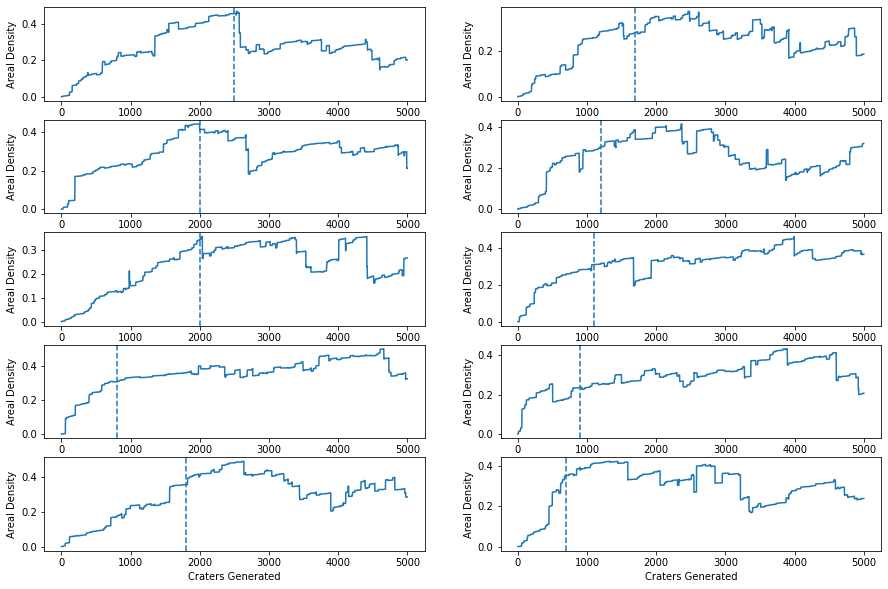

In [88]:
# Setting thresholds from visual inspection
saturation_points = {
    1: 2500,
    2: 1700,
    3: 2000,
    4: 1200,
    5: 2000,
    6: 1100,
    7: 800,
    8: 900,
    9: 1800,
    10: 700,
}
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=1.00,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.40,
                    effective_radius_multiplier=1.50,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10),
                    saturation_points=saturation_points)

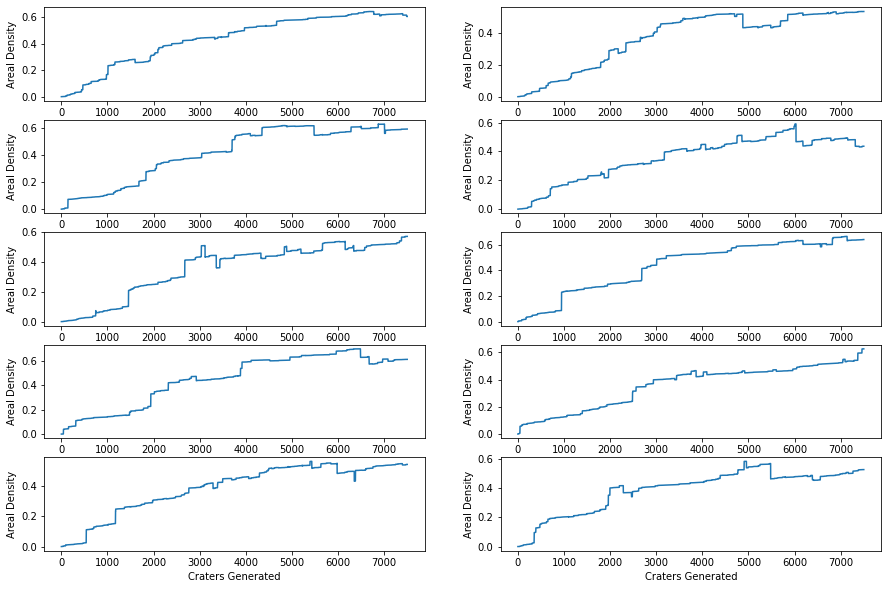

In [93]:
# For run 1.25_3.00_0.60_1.10
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=1.25,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.10,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10))

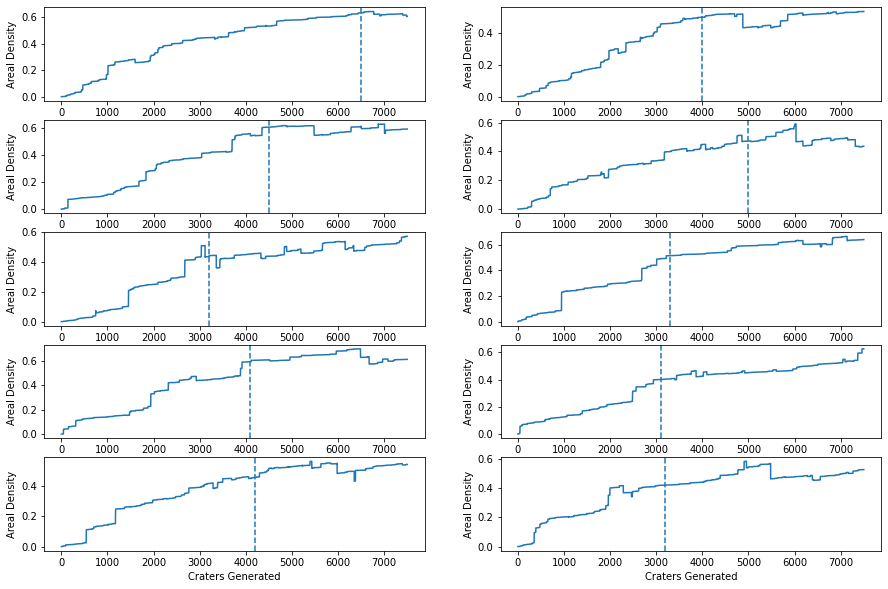

In [94]:
# Setting thresholds from visual inspection
saturation_points = {
    1: 6500,
    2: 4000,
    3: 4500,
    4: 5000,
    5: 3200,
    6: 3300,
    7: 4100,
    8: 3100,
    9: 4200,
    10: 3200,
}
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=1.25,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.10,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10),
                    saturation_points=saturation_points)

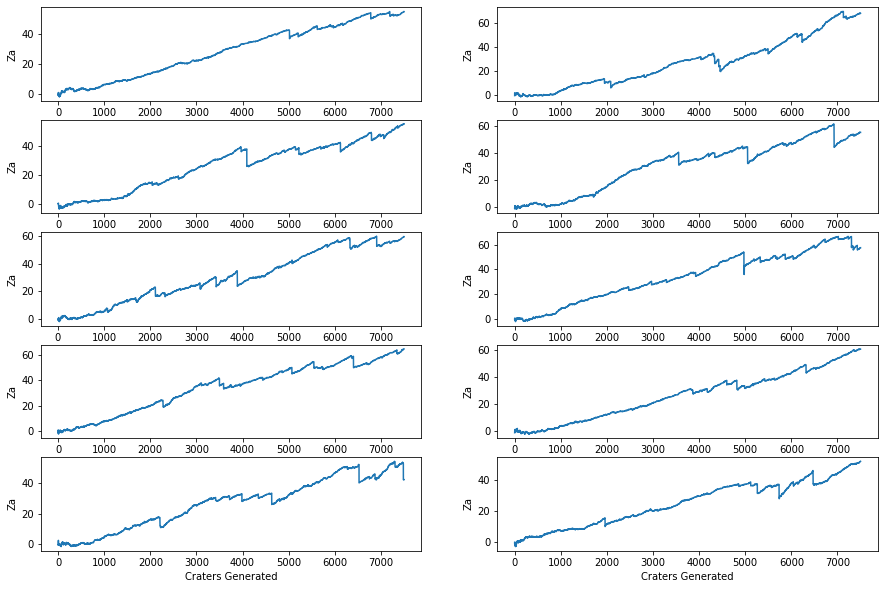

In [111]:
# For run 1.50_5.00_0.60_1.10
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=1.50,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.10,
                    metric="za",
                    metric_label="Za",
                    figsize=(15, 10))

# Parameters

Given the parameter space:
    slope: 1 - 3
    r_stat_multiplier: 3 - 9
    effective_radius: 1.1 - 1.9
    min rim percentage: 0.3 - 0.6

- Test edges of the hypercube, as well as the "center"
- Objective function: competing objectives of areal density and Za (maybe Z eventually)


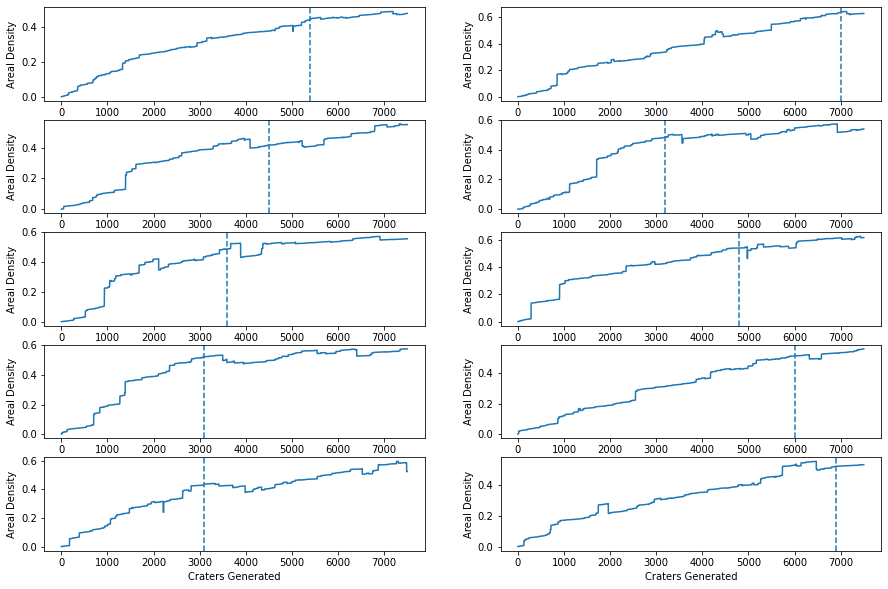

In [106]:
# Setting thresholds from visual inspection
saturation_points = {
    1: 5400,
    2: 7000,
    3: 4500,
    4: 3200,
    5: 3600,
    6: 4800,
    7: 3100,
    8: 6000,
    9: 3100,
    10: 6900,
}
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=1.50,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.10,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10),
                    saturation_points=saturation_points)

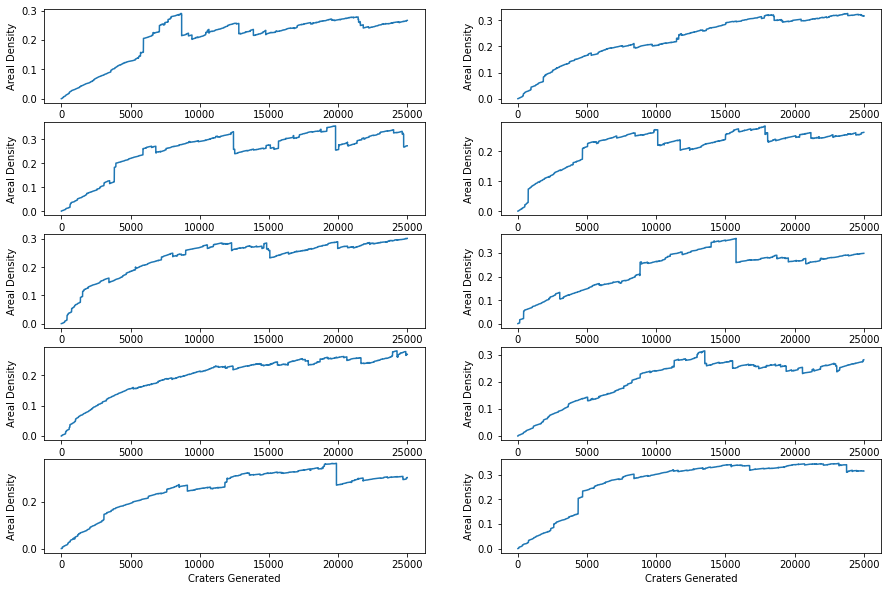

In [107]:
# For run 2.00_5.00_0.60_1.90
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=2.00,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.90,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10))

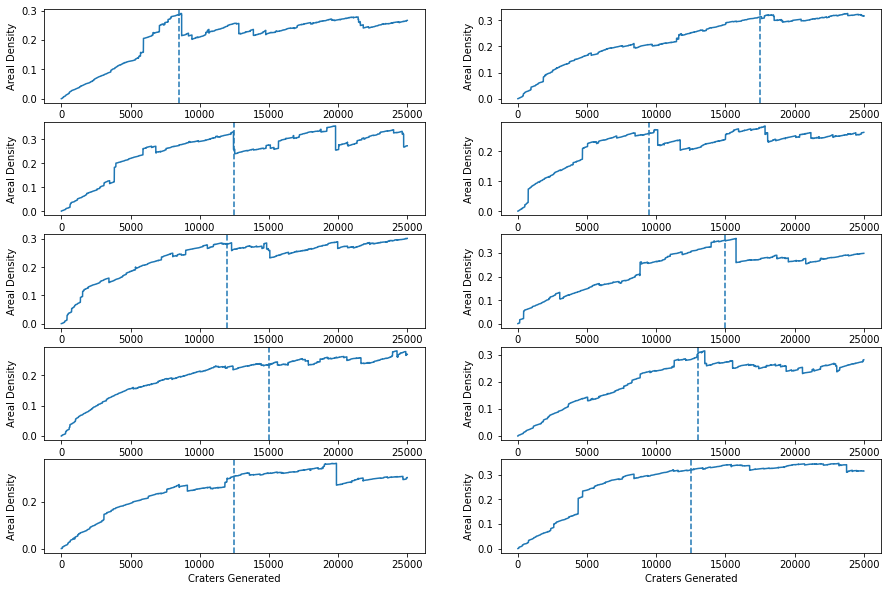

In [110]:
# Setting thresholds from visual inspection
saturation_points = {
    1: 8500,
    2: 17500,
    3: 12500,
    4: 9500,
    5: 12000,
    6: 15000,
    7: 15000,
    8: 13000,
    9: 12500,
    10: 12500,
}
data = plot_metrics(base_path='/home/mason/full_runs/python/manual_labeled_runs/',
                    simulation_ids=list(range(1, 11)),
                    plot_grid_dimensions=(5, 2),
                    slope=2.00,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.90,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10),
                    saturation_points=saturation_points)